# Sales Analysis

In [111]:
# real world practice
# C:\Users\Bhawesh\Desktop\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data

## import nescessary libraries

# import data

In [112]:
import pandas as pd

In [113]:
month_data

NameError: name 'month_data' is not defined

## task1: merging 12 moths of sales data into a single file

In [ ]:
df=pd.read_csv("C:/Users/Bhawesh/Desktop/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv")
df.head()
df.shape

In [ ]:
import os
files=os.listdir('C:/Users/Bhawesh/Desktop/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data')
type(files)

In [ ]:
for file in files :
    print(file)

In [ ]:
all_month_data=pd.DataFrame()
all_month_data
for file in files:
    df=pd.read_csv("C:/Users/Bhawesh/Desktop/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/"+file)
    all_month_data=pd.concat([all_month_data,df])
print(all_month_data.shape)
all_month_data.head()

In [ ]:
all_month_data.to_csv("C:/Users/Bhawesh/Desktop/Pandas-Data-Science-Tasks-master/SalesAnalysis/all_month_data.csv",index=False)

In [ ]:
all_data=pd.read_csv("C:/Users/Bhawesh/Desktop/Pandas-Data-Science-Tasks-master/SalesAnalysis/all_month_data.csv")
all_data.head()

### Agument data with additional month collumn

## Task2 : add a month column

In [ ]:
all_data['Month']=all_data['Order Date'].str[0:2]
all_data.head()

In [ ]:
type(all_data['Month'][0])

## Cleaning data

### Drop rows of NaN

In [ ]:
na_data=all_data[all_data.isna().any(axis=1)]
na_data.head()

In [ ]:
print(all_data.shape)
all_data=all_data.dropna(how='any')
print(all_data.shape)

In [ ]:
tmp_data=all_data[all_data['Order Date'].str[0:2]=='Or']
tmp_data

In [ ]:
tmp_data.shape
all_data.shape

In [ ]:
all_data=all_data[all_data['Order Date'].str[0:2]!='Or']
all_data.shape

In [114]:
type(all_data['Month'][0])

numpy.int32

### Here month column has data type as "str"
### We want to convert it into int32

In [115]:
all_data['Month']=all_data['Month'].astype('int')
type(all_data['Month'][0])

numpy.int32

### Add a sales column 

In [116]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


In [117]:
type(all_data['Price Each'][0])


numpy.float64

In [118]:
type(all_data['Quantity Ordered'][0])

numpy.int64

### Lets convert columns to the correct type

In [119]:
all_data['Price Each']=pd.to_numeric(all_data['Price Each'])
type(all_data['Price Each'][0])

numpy.float64

In [120]:
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered'])
type(all_data['Quantity Ordered'][0])

numpy.int64

In [121]:
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


## Reordering a column

In [122]:
all_data = all_data[["Order ID", "Product", "Quantity Ordered","Price Each","Sales","Order Date","Purchase Address","Month"]]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [123]:
groups=all_data.groupby('Month').sum()


In [124]:
months=[1,2,3,4,5,6,7,8,9,10,11,12]
len(months)

12

In [125]:
import matplotlib.pyplot as plt
%matplotlib inline

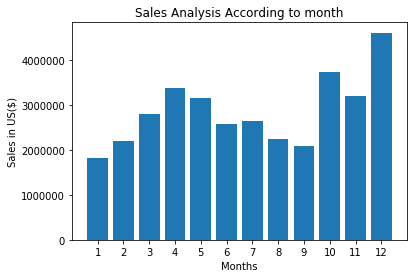

In [126]:
plt.bar(months,groups['Sales'])
plt.xticks(months)
plt.xlabel("Months")
plt.ylabel("Sales in US($)")
plt.title("Sales Analysis According to month")
print()

### Question 2:What city has the maximum number of sales

## Task 1 : Add a city column

In [127]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [128]:
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(",")[2].split(" ")[0]

all_data['City']=all_data['Purchase Address'].apply(lambda x : get_city(x) + " "+get_state(x))
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles


###  But we want to have state code as well

In [129]:
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City']=all_data['Purchase Address'].apply(lambda x : get_city(x) + " "+"("+get_state(x)+")")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


## Aggregate according to City 

In [130]:
groups=all_data.groupby('City').sum()
groups

,Quantity Ordered,Price Each,Sales,Month
City,,,,
Atlanta (GA),16602,2.779908e+06,2.795499e+06,104794
Austin (TX),11153,1.809874e+06,1.819582e+06,69829
Boston (MA),22528,3.637410e+06,3.661642e+06,141112
Dallas (TX),16730,2.752628e+06,2.767975e+06,104620
Los Angeles (CA),33289,5.421435e+06,5.452571e+06,208325
New York City (NY),27932,4.635371e+06,4.664317e+06,175741
Portland (ME),2750,4.471893e+05,4.497583e+05,17144
Portland (OR),11303,1.860558e+06,1.870732e+06,70621
San Francisco (CA),50239,8.211462e+06,8.262204e+06,315520


In [131]:
groups[['Sales']]

,Sales
City,
Atlanta (GA),2.795499e+06
Austin (TX),1.819582e+06
Boston (MA),3.661642e+06
Dallas (TX),2.767975e+06
Los Angeles (CA),5.452571e+06
New York City (NY),4.664317e+06
Portland (ME),4.497583e+05
Portland (OR),1.870732e+06
San Francisco (CA),8.262204e+06


<class 'list'>



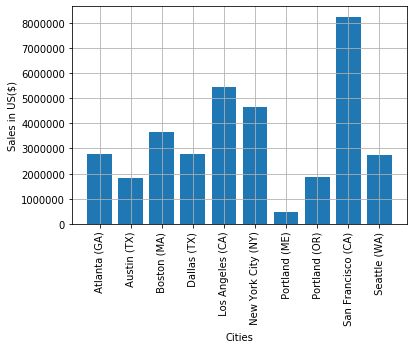

In [132]:
import numpy 
cities=all_data['City'].unique()
sales=groups['Sales'].unique()
#plt.grid(cities,sales)
#cities=[city for city]
cities=[city for city,df in all_data.groupby('City')]

print(type(cities))
type(sales)
plt.bar(cities,sales)
plt.xticks(cities,rotation='vertical')
plt.xlabel("Cities")
plt.ylabel("Sales in US($)")
print()
plt.grid()

In [133]:
len(groups['Sales'])

10

In [134]:
citi

['City']

In [135]:
cities=[city for city,df in all_data.groupby('City')]
cities

[' Atlanta (GA)',
 ' Austin (TX)',
 ' Boston (MA)',
 ' Dallas (TX)',
 ' Los Angeles (CA)',
 ' New York City (NY)',
 ' Portland (ME)',
 ' Portland (OR)',
 ' San Francisco (CA)',
 ' Seattle (WA)']

In [136]:
groups['Sales']

City
 Atlanta (GA)          2.795499e+06
 Austin (TX)           1.819582e+06
 Boston (MA)           3.661642e+06
 Dallas (TX)           2.767975e+06
 Los Angeles (CA)      5.452571e+06
 New York City (NY)    4.664317e+06
 Portland (ME)         4.497583e+05
 Portland (OR)         1.870732e+06
 San Francisco (CA)    8.262204e+06
 Seattle (WA)          2.747755e+06
Name: Sales, dtype: float64

### Q1 : what was the best month for sale? How much money was earned in that month 

In [137]:
print("hello")

hello


### In what time we should display advertisements to maximize likelyhood of custumer's buying product 

In [138]:
 all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


In [143]:
# converting Order Dte into a Datetime object
# so that we can perform standard datetime operation on it
type(all_data['Order Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [141]:
# converting Order Dte into a Datetime object
# so that we can perform standard datetime operation on it
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])
type(all_data['Order Date'][0])

pandas.core.series.Series

In [142]:
type(all_data['Order Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [144]:
# adding an Hour column 
all_data['hour']=all_data['Order Date'].dt.hour

In [147]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,hour
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),22
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),9


In [148]:
all_data['minute']=all_data['Order Date'].dt.minute

In [149]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,hour,minute
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),22,30
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),9,27


In [151]:
gp = all_data.groupby('hour')
gp.groups.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])

In [153]:
lst=[]
for i in gp.groups.keys():
    lst.append(i)
lst

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [163]:
group=gp.count()
sale=group['Sales']
sale

hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Sales, dtype: int64

In [199]:

%pylab inline
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


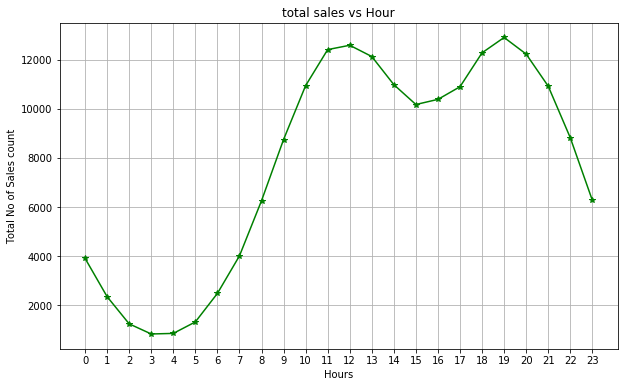

In [200]:
plt.plot(lst,sale,'*g-')
plt.xticks(lst)
plt.title("total sales vs Hour")
plt.grid()
plt.xlabel("Hours")
plt.ylabel("Total No of Sales count")
print()

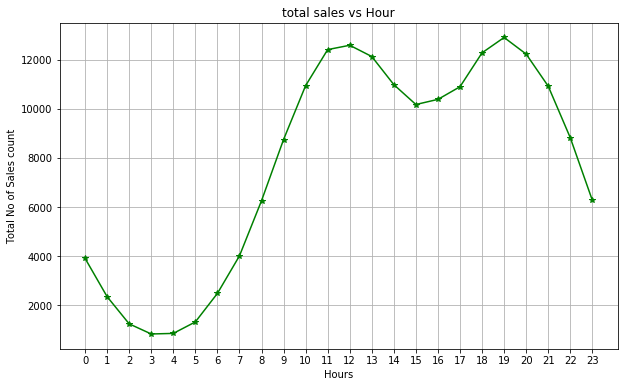

In [201]:
plt.plot(lst,sale,'*g-')
plt.xticks(lst)
plt.title("total sales vs Hour")
plt.grid()
plt.xlabel("Hours")
plt.ylabel("Total No of Sales count")
print()


## what products are most often sold togather

In [202]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,hour,minute
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),22,30
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),9,27


In [ ]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]

In [203]:
import pandas as pd
dt='8/1/2014 0:03:00'
dt

'8/1/2014 0:03:00'

In [204]:
dt=pd.to_datetime(dt)

In [205]:
dt

Timestamp('2014-08-01 00:03:00')

In [206]:
type(dt)

pandas._libs.tslibs.timestamps.Timestamp

In [208]:
dt.day_name()

'Friday'

In [220]:
dt.today()

Timestamp('2020-08-19 18:10:56.248736')